# Board games are awesome!
And we're going to find out the most awesome of qualities 

## Hypothesises

- There will be an optimal complexity level. Folks don't want a game that is too simple or too difficult. 
- Games are under three hours will be more popular.
- People will put value on designers and there will be top ones.  
- It will be very difficult to predict the quality of a board game. While I believe there will be popular mechanics, I don't think there is a magic formula for a perfect board game, as it overall requires a balance. So many combinations of attributes will be seen amongst the top games. 

In [1]:
#data wrangle
import pandas as pd
import numpy as np
import nltk
import json

#visualize
import matplotlib.pyplot as plt
import seaborn as sns

#py funtions
import acquire
import prepare
import explore
import features
import model

#sklearn libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MultiLabelBinarizer

#filter warnings
import warnings
warnings.filterwarnings('ignore')

## Acquire

The dataset was created by webscrapping BoardGameGeek.com. The top 2000 games and their respective attributes were pulled from the api and saved as a json file, which is linked in the readme. The `acquire.get_games` function checks to see if the json files already exist. If they do not, the dataset is repulled. 

In [2]:
acquire.get_games()

data1.txt already exists
data2.txt already exists


Since the files already exits, open the json files and save them as a dataframe.

In [3]:
with open('data1.txt') as f:
    data1 = json.load(f)
    data1 = pd.DataFrame(data1)
    
with open('data2.txt') as f:
    data2 = json.load(f)
    data2 = pd.DataFrame(data2)

In [4]:
# combine the two files together
df = pd.concat([data1,data2])

In [5]:
# view dataframe
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 0 to 999
Data columns (total 17 columns):
name_clean     2000 non-null object
rank           2000 non-null object
name           2000 non-null object
year           2000 non-null object
min_players    2000 non-null object
max_players    2000 non-null object
min_time       2000 non-null object
max_time       2000 non-null object
designer       2000 non-null object
category       2000 non-null object
mechanic       2000 non-null object
publisher      2000 non-null object
description    2000 non-null object
num_votes      2000 non-null object
avg_rating     2000 non-null object
geek_rating    2000 non-null object
complexity     2000 non-null object
dtypes: object(17)
memory usage: 281.2+ KB


,name_clean,rank,name,year,min_players,max_players,min_time,max_time,designer,category,mechanic,publisher,description,num_votes,avg_rating,geek_rating,complexity
0,Gloomhaven,1,Gloomhaven,2017,1,4,60,120,[Isaac Childres],"[Adventure, Exploration, Fantasy, Fighting, Mi...","[Campaign / Battle Card Driven, Cooperative Ga...","[Cephalofair Games, Albi, Asmodee, Feuerland S...",Gloomhaven is a game of Euro-inspired tactica...,30560,8.85478,8.58519,3.8076
1,Pandemic Legacy: Season 1,2,Pandemic Legacy: Season 1,2015,2,4,60,60,"[Rob Daviau, Matt Leacock]","[Environmental, Medical]","[Action Points, Cooperative Game, Hand Managem...","[Z-Man Games, Inc., Asterion Press, Devir, Fil...",Pandemic Legacy is a co-operative campaign gam...,34334,8.62531,8.47209,2.8304
2,Terraforming Mars,3,Terraforming Mars,2016,1,5,120,120,[Jacob Fryxelius],"[Economic, Environmental, Industry / Manufactu...","[Card Drafting, End Game Bonuses, Hand Managem...","[FryxGames, Arclight, Fantasmagoria, Ghenos Ga...","In the 2400s, mankind begins to terraform the ...",47320,8.41905,8.26233,3.2325
3,Through the Ages: A New Story of Civilization,4,Through the Ages: A New Story of Civilization,2015,2,4,120,120,[Vlaada Chvátil],"[Card Game, Civilization, Economic]","[Action Points, Auction/Bidding, Auction: Dutc...","[Czech Games Edition, Cranio Creations, Devir,...",Through the Ages: A New Story of Civilization ...,18034,8.49757,8.23881,4.3839
4,Brass: Birmingham,5,Brass: Birmingham,2018,2,4,60,120,"[Gavan Brown, Matt Tolman, Martin Wallace]","[Economic, Industry / Manufacturing, Transport...","[Hand Management, Income, Loans, Market, Netwo...","[Roxley, BoardM Factory, Conclave Editora, Cro...",Brass: Birmingham is an economic strategy game...,9615,8.62119,8.19448,3.9222


## Prepare

All the columns were pulled as objects, which is not reflective of their actual property. Change to approporiate numeric values.

In [6]:
df[["rank", "year", "min_players","max_players", 
    "min_time", "max_time", "num_votes", 
    "avg_rating", "geek_rating", "complexity"]] = df[["rank", "year", "min_players", "max_players", 
                                                      "min_time", "max_time", "num_votes", 
                                                      "avg_rating", "geek_rating", "complexity"
                                                     ]].apply(pd.to_numeric)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 0 to 999
Data columns (total 17 columns):
name_clean     2000 non-null object
rank           2000 non-null int64
name           2000 non-null object
year           2000 non-null int64
min_players    2000 non-null int64
max_players    2000 non-null int64
min_time       2000 non-null int64
max_time       2000 non-null int64
designer       2000 non-null object
category       2000 non-null object
mechanic       2000 non-null object
publisher      2000 non-null object
description    2000 non-null object
num_votes      2000 non-null int64
avg_rating     2000 non-null float64
geek_rating    2000 non-null float64
complexity     2000 non-null float64
dtypes: float64(3), int64(7), object(7)
memory usage: 281.2+ KB


Since the list of attributes were pulled from two different locations (the browse page and the game's individual api), compare the names from both locations to ensure they match for a sanity check.

In [8]:
df [df.name_clean != df.name]

,name_clean,rank,name,year,min_players,max_players,min_time,max_time,designer,category,mechanic,publisher,description,num_votes,avg_rating,geek_rating,complexity
100,War of the Ring (First Edition),101,War of the Ring,2004,2,4,120,120,"[Roberto Di Meglio, Marco Maggi, Francesco Nep...","[Adventure, Fantasy, Miniatures, Novel-based, ...","[Action Points, Area Majority / Influence, Are...","[Ares Games, Asmodee, Devir, Fantasy Flight Ga...","In War of the Ring, one player takes control o...",9592,7.77432,7.45471,3.8417
406,\nCarrom\n,1407,Carrom,0,2,4,60,60,[(Uncredited)],[Action / Dexterity],"[Flicking, Team-Based Game]","[(Public Domain), (Unknown), ABRA, ASS Altenbu...",Carrom is most easily described as &quot;finge...,1471,7.00333,6.28100,1.4874


> Yay! All the names match. There is just some slight differences on name formatting. For Carrom, the name column should be retained. The War of the Ring (First Edition) will be retained, as it is more descriptive.  

In [9]:
# replace War of the Ring "name" with "name_clean"
df.name.iloc[100] = df.name_clean.iloc[100]

# drop "name_clean" column
df.drop('name_clean', axis=1, inplace=True)

# move the "name" column to the beginning
df.insert(0,'name',df.pop("name"))

In [10]:
df.head()

,name,rank,year,min_players,max_players,min_time,max_time,designer,category,mechanic,publisher,description,num_votes,avg_rating,geek_rating,complexity
0,Gloomhaven,1,2017,1,4,60,120,[Isaac Childres],"[Adventure, Exploration, Fantasy, Fighting, Mi...","[Campaign / Battle Card Driven, Cooperative Ga...","[Cephalofair Games, Albi, Asmodee, Feuerland S...",Gloomhaven is a game of Euro-inspired tactica...,30560,8.85478,8.58519,3.8076
1,Pandemic Legacy: Season 1,2,2015,2,4,60,60,"[Rob Daviau, Matt Leacock]","[Environmental, Medical]","[Action Points, Cooperative Game, Hand Managem...","[Z-Man Games, Inc., Asterion Press, Devir, Fil...",Pandemic Legacy is a co-operative campaign gam...,34334,8.62531,8.47209,2.8304
2,Terraforming Mars,3,2016,1,5,120,120,[Jacob Fryxelius],"[Economic, Environmental, Industry / Manufactu...","[Card Drafting, End Game Bonuses, Hand Managem...","[FryxGames, Arclight, Fantasmagoria, Ghenos Ga...","In the 2400s, mankind begins to terraform the ...",47320,8.41905,8.26233,3.2325
3,Through the Ages: A New Story of Civilization,4,2015,2,4,120,120,[Vlaada Chvátil],"[Card Game, Civilization, Economic]","[Action Points, Auction/Bidding, Auction: Dutc...","[Czech Games Edition, Cranio Creations, Devir,...",Through the Ages: A New Story of Civilization ...,18034,8.49757,8.23881,4.3839
4,Brass: Birmingham,5,2018,2,4,60,120,"[Gavan Brown, Matt Tolman, Martin Wallace]","[Economic, Industry / Manufacturing, Transport...","[Hand Management, Income, Loans, Market, Netwo...","[Roxley, BoardM Factory, Conclave Editora, Cro...",Brass: Birmingham is an economic strategy game...,9615,8.62119,8.19448,3.9222


In [11]:
print(f'There are {len(df)} games in the dataset. There are {df.name.nunique()} unique games in the datasets.')

There are 2000 games in the dataset. There are 1994 unique games in the datasets.


> These values should match and they do not. Investigate further. 

In [12]:
df [df.name.duplicated(keep=False)].sort_values(["name", "rank"])

,name,rank,year,min_players,max_players,min_time,max_time,designer,category,mechanic,publisher,description,num_votes,avg_rating,geek_rating,complexity
206,Axis & Allies,1207,2004,2,5,240,240,"[Larry Harris, Jr., Mike Selinker]","[Economic, Wargame, World War II]","[Area Movement, Dice Rolling, Team-Based Game]","[Avalon Hill Games, Inc., Tilsit]",Axis &amp; Allies (2004) aka Axis &amp; Allies...,5654,6.70695,6.36629,3.2083
330,Axis & Allies,1331,1981,2,5,180,180,"[Larry Harris, Jr.]","[Economic, Wargame, World War II]","[Area Movement, Dice Rolling, Minimap Resoluti...","[Jedko Games, Milton Bradley, Nova Game Design...",Axis and Allies is the most successful of Milt...,9860,6.56039,6.30784,3.0414
370,Citadels,371,2000,2,8,20,60,[Bruno Faidutti],"[Bluffing, Card Game, City Building, Deduction...","[Action Drafting, Card Drafting, Set Collectio...","[Hans im Glück, (Unknown), 999 Games, Arclight...","In Citadels, players take on new roles each ro...",45189,7.09306,6.99229,2.0554
479,Citadels,480,2016,2,8,30,60,[Bruno Faidutti],"[Bluffing, Card Game, City Building, Fantasy, ...","[Card Drafting, Set Collection, Turn Order: Ro...","[(Unknown), 999 Games, Asmodee, Delta Vision P...","In Citadels, players take on new roles each ro...",4917,7.34709,6.87639,2.0000
127,Cosmic Encounter,128,2008,3,5,60,120,"[Bill Eberle, Jack Kittredge, Bill Norton, Pet...","[Bluffing, Negotiation, Science Fiction, Space...","[Alliances, Auction/Bidding, Hand Management, ...","[Fantasy Flight Games, Arclight, Asterion Pres...",From the Manufacturer&#10;&#10;Build a galacti...,25156,7.54532,7.38523,2.5710
977,Cosmic Encounter,978,1977,2,6,90,90,"[Bill Eberle, Jack Kittredge, Bill Norton, Pet...","[Bluffing, Negotiation, Science Fiction]","[Hand Management, Variable Player Powers]","[Eon, Alga, ASS Altenburger Spielkarten, Desca...","By request of Fantasy Flight Games, Board Game...",3784,6.91563,6.49145,2.3656
646,Cosmic Encounter,1647,1991,3,6,60,60,"[Bill Eberle, Jack Kittredge, Bill Norton, Pet...","[Bluffing, Card Game, Science Fiction]",[Variable Player Powers],"[Hexagames (I), Mayfair Games]",Players represent alien races that are seeking...,957,7.20397,6.18843,2.6230
258,Dune,259,1979,2,6,60,180,"[Bill Eberle, Jack Kittredge, Peter Olotka]","[Bluffing, Fighting, Negotiation, Novel-based,...","[Alliances, Area Majority / Influence, Area Mo...","[The Avalon Hill Game Co, Descartes Editeur, H...","Set thousands of years in the future, Dune the...",5236,7.62304,7.13713,3.4402
85,Dune,1086,2019,2,6,120,120,"[Bill Eberle, Jack Kittredge, Peter Olotka]",[Science Fiction],"[Alliances, Area Majority / Influence, Auction...","[Gale Force Nine, LLC]",Imagine you can control the forces of a noble ...,812,8.37755,6.43483,3.8438
300,Lord of the Rings: The Confrontation,301,2005,2,2,30,30,"[Reiner Knizia, Eric M. Lang, Christian T. Pet...","[Adventure, Bluffing, Deduction, Fantasy, Movi...","[Area Movement, Hand Management, Secret Unit D...","[Edge Entertainment, Fantasy Flight Games, Gal...",This Deluxe Edition of Reiner Knizia&rsquo;s a...,5323,7.48758,7.06918,2.2018


> Many of these games have repeated names, but different release years and ratings, implying different editions. All of these duplicates will be retained. 

In [13]:
df.description

0      Gloomhaven  is a game of Euro-inspired tactica...
1      Pandemic Legacy is a co-operative campaign gam...
2      In the 2400s, mankind begins to terraform the ...
3      Through the Ages: A New Story of Civilization ...
4      Brass: Birmingham is an economic strategy game...
                             ...                        
995    Ganymede is a development and tableau-building...
996    Although dubbed a game-kit, this 18xx offering...
997    Precursor of the Mutant Chronicles miniatures ...
998    Cheating is forbidden? Not in this naughty gam...
999    Era: Medieval Age serves as the spiritual succ...
Name: description, Length: 2000, dtype: object

The description will be cleaned up for natural language processing using the following functions.

`prepare.basic_clean`
- text is lowercased
- text is normalizes all special characters
- anything that is not a character, number, whitespace or apostrophe is removed
- new lines and returns are replaced with a space

`prepare.remove_stopwords`
- removes stop words found in the standard stopword list
- returns string of words

`prepare.lemmatize`
- lemmatizes applicable words

In [14]:
df.description = df.description.apply(prepare.basic_clean).apply(prepare.remove_stopwords).apply(prepare.lemmatize)

In [15]:
df.description

0      gloomhaven game euroinspired tactical combat p...
1      pandemic legacy cooperative campaign game over...
2      2400s mankind begin terraform planet mar giant...
3      age new story civilization new edition age sto...
4      brass birmingham economic strategy game sequel...
                             ...                        
995    ganymede development tableaubuilding game play...
996    although dubbed gamekit 18xx offering topnotch...
997    precursor mutant chronicle miniature game kiss...
998    cheating forbidden naughty game card ndash fac...
999    era medieval age serf spiritual successor roll...
Name: description, Length: 2000, dtype: object

## Explore

Investigate the values in each of the columns

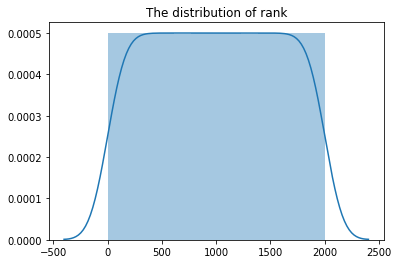

In [ ]:
for col in df.select_dtypes(np.number).columns:
    sns.distplot(df[col])
    plt.title(f"The distribution of {col}")
    plt.xlabel("")
    plt.show()
    print(df[col].value_counts(bins=10, sort=False))

> To further investigate:
- the difference between geek_rating and avg_rating
- board games with years in the negative
- what board games have max players over 20 people? sounds like it wouldn't fit on a board
- what board game has a minimum time of 6000 minutes?! 

#### Geek vs average rating

In [ ]:
sns.distplot(df.geek_rating)
sns.distplot(df.avg_rating)
plt.legend(["geek rating", "average rating"])
plt.show()

> It is clearly seen that the geek rating is pulled towards the center. If many more games were pulled, the geek_rating would probably reflect a normalized distribution.

#### Board games with negative years

In [ ]:
df [df.year < 1400]

I thought these were typos. 
- Go definitely originated in BC time. Documents state origin times between 2000 and 5000 years ago
- Research states that backgammon is about 5000 years old
- Xiangpi also appears to be in the correct range.
- It is unknown when Carrom originated. It became popular in the 19th century, but is believed to have been around much longer. 

> These dates appear appropriate. However, as outliers, they do skew the data, as I'm interested in analyzing the success of current games. Games older than 1950 will be removed. 

In [ ]:
df = df [df.year > 1950]

In [ ]:
df.shape

> Twenty games were removed

In [ ]:
sns.distplot(df.year)
plt.show()

> It is seen that the popularity of board games have definitely spiked in the past twenty years. 

#### Board games with a high number of max players

In [ ]:
df [df.max_players > 20]

In [ ]:
len(df [df.max_players > 20])

> There are 10 games that have greater than 20 players. As I define a board game as something that can be played sitting at a table, I consider these high player games to be an outlier and will remove them. 

In [ ]:
df = df [df.max_players <= 20]

In [ ]:
df.shape

#### Board games with high minimum times 

In [ ]:
df [df.min_time > 600]

> What is 'Empire in Arms' and why would anyone play such a long game? Anything longer than 12 hours is defintely a marathon game and will be excluded from this analysis. 

In [ ]:
df = df [df.min_time < 600]

In [ ]:
df.shape

> After removing outlier data, there are still 1965 games to investigate. 

In [ ]:
# reset index due to missing rows
df = df.reset_index().drop(columns='index')

#### Feature Engineering

How long is each readme? 

In [ ]:
explore.description_length(df)

In [ ]:
sns.distplot(df.desc_length)
plt.show()

#### Correlations

In [ ]:
plt.figure(figsize=(12,9))
sns.heatmap(df.corr(), annot=True, cmap="copper")
plt.show()

Takeaways
- The geek_rating and rank have a high correlation, as they should, since the rank is based on the geek_rating. Will have to remove geek_rating.
- There is some correlation with the geek_rating and avg_rating and votes. This makes sense as the geek_rating is a weighted value based on the those two features. 
- There is also some correlation between min_time and max_time, which also makes sense, as games times typically fall into a relatively small range. 
- There is correlation between the complexity and min time and avg_rating. However, the complexity doesn't affect the geek_rating as much. 

In [ ]:
sns.pairplot(df)
plt.show()

> The overwhelming pairplot. Let's dive into some of the more interesting plots.

In [ ]:
sns.scatterplot(data=df, x='year', y='geek_rating',hue='complexity', palette='copper', alpha=.7)
plt.title("Current games achieve higher ratings")
plt.show()

> I believe with the explosion of board games, designers forced to think outside the box, and therefore, getting more creative. This is leading to more originality and more fun, and higher ranked games in the recent years. 

> Surprisingly, it appears that higher ranked games tend to be more complex.

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(12,5), sharey=True, sharex=True)

sns.scatterplot(data=df, x='avg_rating', y='complexity', alpha=.5, ax=ax[0])
sns.scatterplot(data=df, x='geek_rating', y='complexity', alpha=.5, ax=ax[1])

fig.suptitle('How does complexity affect the raw averages vs the weighted averages?')
plt.show()

> Before the averages are weighted (avg_rating), it is seen that more complex games are consistently rater higher.

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(12,5), sharey=True)

sns.scatterplot(data=df, y='desc_length', x='complexity', alpha=.5, ax=ax[0])
sns.scatterplot(data=df, y='desc_length', x='year', alpha=.5, ax=ax[1])

fig.suptitle('How does the description length compare to the complexity and year?')
plt.show()

> The description length is fairly consistent regardless of complexity or year.

#### Investigate game times

In [ ]:
df.max_time.agg(["mean","median"])

> The mean game time of an hour and a half is shorter than I expected

In [ ]:
sns.scatterplot(data=df[(df.geek_rating > 8)], x='max_time', y='geek_rating', alpha=.5)
sns.scatterplot(data=df[(df.geek_rating > 7) & (df.geek_rating < 8)], x='max_time', y='geek_rating', alpha=.5)
plt.title("Max times for higher ranking games")
plt.show()

In [ ]:
df [df.geek_rating > 7].max_time.agg(["mean","median"])

In [ ]:
df [df.geek_rating > 8].max_time.agg(["mean","median"])

> Looking at the top of the top games, it's seen that the average game time increases to over two and a half hours. 

In [ ]:
sns.scatterplot(data=df[(df.max_time > 180)], x='max_time', y='geek_rating', alpha=.5)
plt.show()

> For games over three hours, it is seen that they span all rankings. However, the very high game time are ranked relatively lower.

#### Most popular designers

In [ ]:
# pull designers out of lists
designers = [des for game in df.designer for des in game]
des_count = pd.Series(designers).value_counts()

# plot the most commonly seen designers
plt.figure(figsize=(10,6))
des_count.head(20).sort_values().plot.barh()
plt.show()

> Reiner Knizia is the top designer of board games. Let's look at some of their stats. 

In [ ]:
# dataframe with all reiner knizia games
df_rknizia = df [df.designer.apply(lambda x: "Reiner Knizia" in x)]

In [ ]:
print("Reiner Knizia has published {} of the top 2000 games.".format(len(df_rknizia)))

In [ ]:
categories = [cat for game in df_rknizia.category for cat in game]
pd.Series(categories).value_counts().head(20)

> Definitely see some reoccurring themes in their work. 

In [ ]:
sns.distplot(df_rknizia.year, bins=20)
plt.show()

> They were making games before the rise in the 2000s, but have continued to be prolific. 

In [ ]:
sns.scatterplot(data=df_rknizia, x='year', y="geek_rating")
plt.title("Knizia games ratings compared to publish year")
plt.show()

#### Top ten designer ranking distribution

In [ ]:
top_ten_designer = des_count.head(10).index

for des in top_ten_designer:
    mask = df.designer.apply(lambda x: des in x)
    sns.distplot(df[mask].avg_rating)

plt.title("Ratings for the ten most popular designers")
plt.show()

#### Designer of top game

In [ ]:
df.designer[0]

In [ ]:
# dataframe with all isaac childres games
df [df.designer.apply(lambda x: "Isaac Childres" in x)]

> Isaac Childres is the designer of the top-rated game on bbg. However, only two other of his games have made the top 2000 list and ony of them is an offshoot of his original game. 

#### Categories

In [ ]:
categories = [cat for game in df.category for cat in game]
cat_count = pd.Series(categories).value_counts()

plt.figure(figsize=(10,6))
cat_count.head(20).sort_values().plot.barh()
plt.show()

> Us nerds like fantasy and science fiction. Wargame is a classic board game genre. I love when a board game has awesome minatures. Surprised to see 'animals' as a top category. 

#### Mechanics

In [ ]:
mechanics = [mech for game in df.mechanic for mech in game]
mech_count = pd.Series(mechanics).value_counts()

plt.figure(figsize=(10,6))
mech_count.head(20).sort_values().plot.barh()
plt.show()

In [ ]:
mask = df.mechanic.apply(lambda x: "Hand Management" in x)
len(df[mask])/len(df)

> Over a third of all the top games deal with hand management!

> Hand Management and Dice Rolling are the top two mechanics. These are standard game mechanics and expected to be at the top. Variable Player Powers and Card Drafting are super fun and glad to see them at the top. 

#### Description word cloud explosion

In [ ]:
all_words = ' '.join(df.description)

In [ ]:
explore.one_word_one_cloud(all_words, "all")

> It was seen in both categories and mechanics that card game was a top descriptor. Cards are generally a vital component to creating a game. I'm surprised to see 'tile' and 'city' as top words and am unsure what 'ndash' refers to. 

In [ ]:
all_words_bigram = pd.Series(nltk.ngrams(all_words.split(), 2)).value_counts().head(100)

In [ ]:
explore.two_word_one_cloud(all_words_bigram, "bigrams")

> As many times 'player' is seen in the bigrams, it's suprisingly it's not the top main word. 

In [ ]:
all_words_trigram = pd.Series(nltk.ngrams(all_words.split(), 3)).value_counts().head(30)

In [ ]:
explore.three_word_one_cloud(all_words_trigram, "trigrams")

> The 10s in the word clouds are apart of the quote ascii formatting. If there is enough time later, regex the ascii code out. 

## Split

In [ ]:
# set random state for repeatability
train, test = train_test_split(df, random_state=123)

Separate features and target. The geek_rating (which is used to establish rank) is used as the target value. The rank, avg_rating, and num_votes are all dropped from the X_train/test, as well, as they are not instrinic parameters of the game. 

In [ ]:
X_train = train.drop(columns = ["rank", "avg_rating", "geek_rating", "num_votes"])
y_train = train[["geek_rating"]]
X_test = test.drop(columns = ["rank", "avg_rating", "geek_rating", "num_votes"])
y_test = test[["geek_rating"]]

## Model 1 - numeric values only

In [ ]:
# model and evaluate 
lm = model.linear_model_and_eval(X_train, y_train)

> This model is terrible. Adding in categories, mechanics, and designers should increase performance. 

## Model 2 - include categories only

In [ ]:
# create of list of the top twenty categories
cat_list = list(cat_count.head(20).index)

In [ ]:
# convert categories to binary matrix and merge into df
mlb = MultiLabelBinarizer()

X_train_cat = X_train.join(pd.DataFrame(mlb.fit_transform(X_train.category), 
                                        columns=mlb.classes_, 
                                        index=X_train.index)[cat_list])

X_test_cat = X_test.join(pd.DataFrame(mlb.fit_transform(X_test.category), 
                                        columns=mlb.classes_, 
                                        index=X_test.index)[cat_list])

In [ ]:
# model and evaluate 
lm = model.linear_model_and_eval(X_train_cat, y_train)

> This model is still terrible, but it indeed performed a little better

## Model 3 - include mechanics only

In [ ]:
# create of list of the top twenty mechanics
mech_list = list(mech_count.head(20).index)

In [ ]:
# convert mechanics to binary matrix and merge into df
mlb = MultiLabelBinarizer()
X_train_mech = X_train.join(pd.DataFrame(mlb.fit_transform(X_train.mechanic),
                                         columns=mlb.classes_,
                                         index=X_train.index)[mech_list])

X_test_mech = X_test.join(pd.DataFrame(mlb.fit_transform(X_test.mechanic), 
                                        columns=mlb.classes_, 
                                        index=X_test.index)[mech_list])

In [ ]:
# model and evaluate 
lm = model.linear_model_and_eval(X_train_mech, y_train)

> And this model got a little better

## Model 4 - include designers only

In [ ]:
# create of list of the top twenty mechanics
des_list = list(des_count.head(10).index)

In [ ]:
# convert designers to binary matrix and merge into df
mlb = MultiLabelBinarizer()
X_train_des = X_train.join(pd.DataFrame(mlb.fit_transform(X_train.designer),
                          columns=mlb.classes_,
                          index=X_train.index)[des_list])

X_test_des = X_test.join(pd.DataFrame(mlb.fit_transform(X_test.designer),
                          columns=mlb.classes_,
                          index=X_test.index)[des_list])

In [ ]:
# model and evaluate 
lm = model.linear_model_and_eval(X_train_des, y_train)

> Didn't perform as well as the mechanics

## Model 5 - categories and mechanics

In [ ]:
# combine categories and mechanics  
X_train_cat_mech = X_train_cat.join(pd.DataFrame(mlb.fit_transform(X_train.mechanic),
                                                 columns=mlb.classes_,
                                                 index=X_train.index)[mech_list])

X_test_cat_mech = X_test_cat.join(pd.DataFrame(mlb.fit_transform(X_test.mechanic),
                                                 columns=mlb.classes_,
                                                 index=X_test.index)[mech_list])

In [ ]:
# model and evaluate 
lm = model.linear_model_and_eval(X_train_cat_mech, y_train)

> This improved the stand-alone category and mechanics model. 

## Model 6 - catergories and mechanics and designers

In [ ]:
# combine categories and mechanics and designer
X_train_cat_mech_des = X_train_cat_mech.join(pd.DataFrame(mlb.fit_transform(X_train.designer),
                                                 columns=mlb.classes_,
                                                 index=X_train.index)[des_list])

X_test_cat_mech_des = X_test_cat_mech.join(pd.DataFrame(mlb.fit_transform(X_test.designer),
                                                 columns=mlb.classes_,
                                                 index=X_test.index)[des_list])

In [ ]:
# model and evaluate 
lm = model.linear_model_and_eval(X_train_cat_mech_des, y_train)

> Anddddd a tiny bit better

## Test

The model with basic stats, designers, categories, and mechanics performed best. This is selected as the final model and will be test. 

In [ ]:
model.test_model_and_eval(lm, X_test_cat_mech_des, y_test)

> The model is slightly overfit. 

## Conclusions

- I found designers that I want to check out. 
- If I ever designed my own game, I'd opt for a two hour game with a slighly higher complexity.
- The best model performed with only a r_squared value of 19%. And it was slightly overfit. 
- Next steps would to remove the ascii code from the descriptions and then model. 
- Also, with more time, I would change the number of input features for the model, to alleviate some of the overfitting. 

I enjoyed data sciencing on something that I can highly relate to and look forward to applying data science to more impactful areas.